In [2]:
import pandas as pd
from filehandling import get_directory_filenames
from os.path import split, splitext
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mean_files = get_directory_filenames("/media/NAS/share/James/SimulationDataSep22/*.means")
median_files = get_directory_filenames("/media/NAS/share/James/SimulationDataSep22/*.medians")

v_hoz            0.005514
v_hoz_1000_Hz    0.005510
v_hoz_400_Hz     0.005503
v_hoz_200_Hz     0.005489
v_hoz_100_Hz     0.005460
v_hoz_80_Hz      0.005445
v_hoz_67_Hz      0.005431
v_hoz_50_Hz      0.005402
v_hoz_40_Hz      0.005374
v_hoz_33_Hz      0.005346
v_hoz_20_Hz      0.005235
v_hoz_10_Hz      0.004962
dtype: float64
v_hoz            0.004094
v_hoz_1000_Hz    0.004092
v_hoz_400_Hz     0.004086
v_hoz_200_Hz     0.004076
v_hoz_100_Hz     0.004056
v_hoz_80_Hz      0.004046
v_hoz_67_Hz      0.004036
v_hoz_50_Hz      0.004015
v_hoz_40_Hz      0.003995
v_hoz_33_Hz      0.003975
v_hoz_20_Hz      0.003893
v_hoz_10_Hz      0.003691
dtype: float64
v_hoz            0.006371
v_hoz_1000_Hz    0.006366
v_hoz_400_Hz     0.006355
v_hoz_200_Hz     0.006334
v_hoz_100_Hz     0.006290
v_hoz_80_Hz      0.006268
v_hoz_67_Hz      0.006246
v_hoz_50_Hz      0.006202
v_hoz_40_Hz      0.006159
v_hoz_33_Hz      0.006117
v_hoz_20_Hz      0.005963
v_hoz_10_Hz      0.005624
dtype: float64
v_hoz            0.

<ipython-input-4-4199aa19b760>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


v_hoz            0.065740
v_hoz_1000_Hz    0.065519
v_hoz_400_Hz     0.064991
v_hoz_200_Hz     0.064065
v_hoz_100_Hz     0.062307
v_hoz_80_Hz      0.061486
v_hoz_67_Hz      0.060702
v_hoz_50_Hz      0.059231
v_hoz_40_Hz      0.057889
v_hoz_33_Hz      0.056672
v_hoz_20_Hz      0.052816
v_hoz_10_Hz      0.047027
dtype: float64
v_hoz            0.069144
v_hoz_1000_Hz    0.068941
v_hoz_400_Hz     0.068470
v_hoz_200_Hz     0.067639
v_hoz_100_Hz     0.066039
v_hoz_80_Hz      0.065286
v_hoz_67_Hz      0.064563
v_hoz_50_Hz      0.063205
v_hoz_40_Hz      0.061961
v_hoz_33_Hz      0.060822
v_hoz_20_Hz      0.057131
v_hoz_10_Hz      0.051340
dtype: float64
v_hoz            0.061813
v_hoz_1000_Hz    0.061647
v_hoz_400_Hz     0.061264
v_hoz_200_Hz     0.060574
v_hoz_100_Hz     0.059221
v_hoz_80_Hz      0.058578
v_hoz_67_Hz      0.057959
v_hoz_50_Hz      0.056794
v_hoz_40_Hz      0.055722
v_hoz_33_Hz      0.054733
v_hoz_20_Hz      0.051447
v_hoz_10_Hz      0.046063
dtype: float64
v_hoz            0.

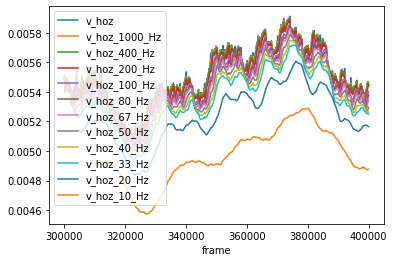

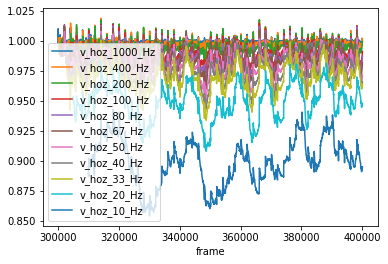

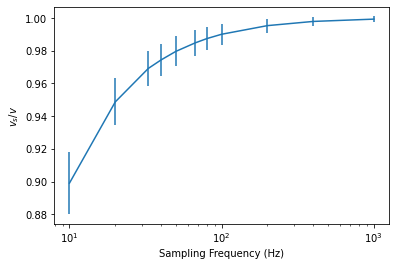

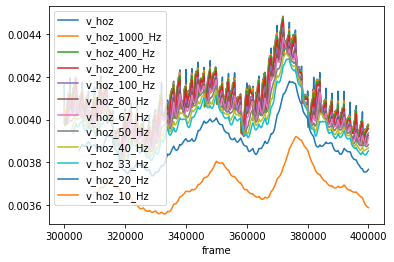

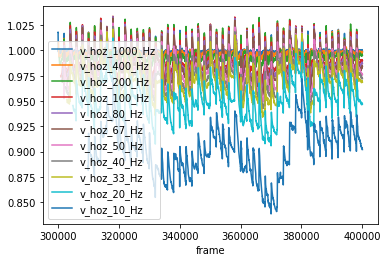

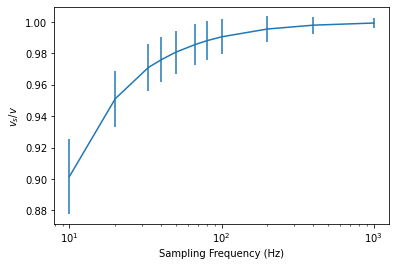

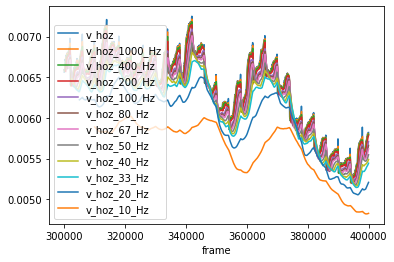

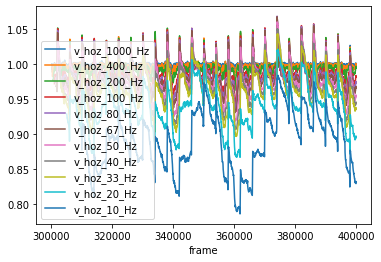

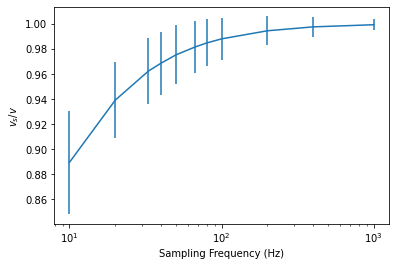

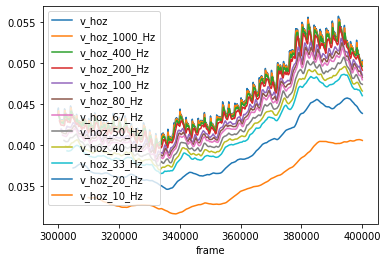

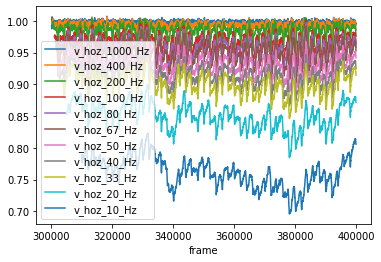

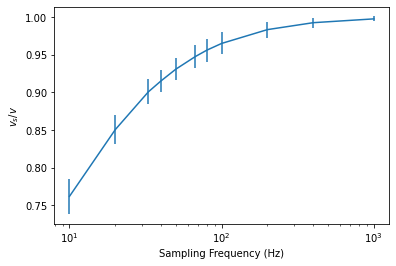

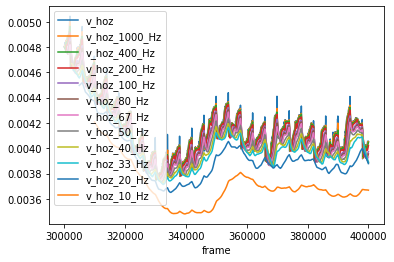

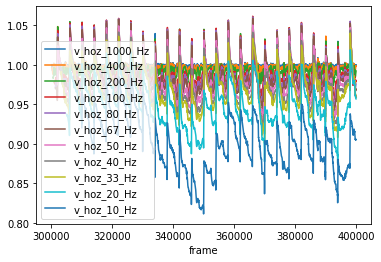

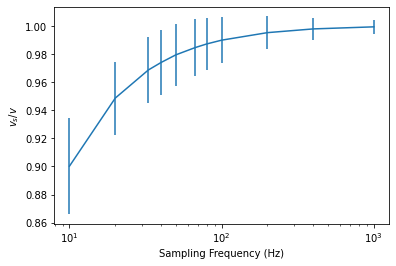

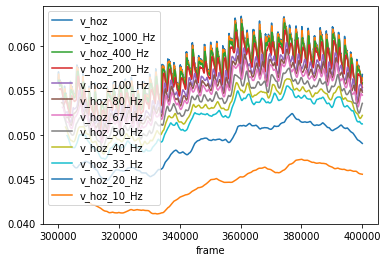

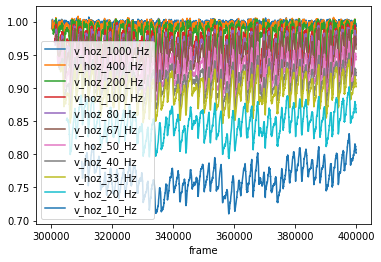

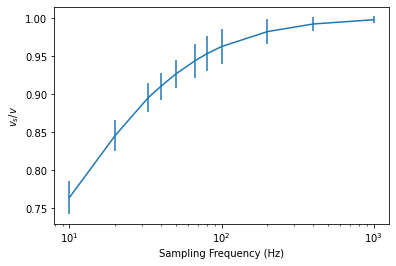

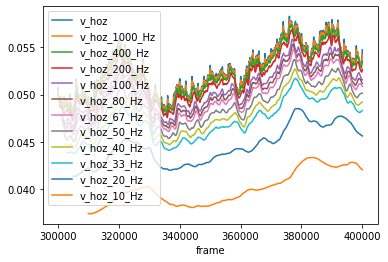

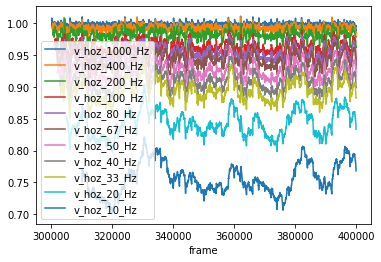

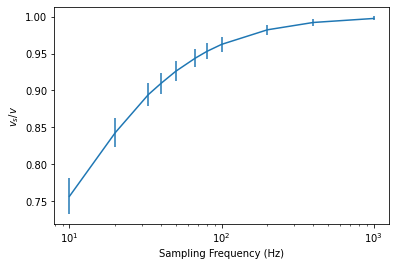

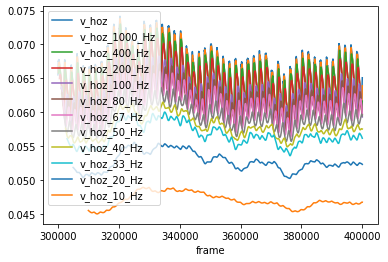

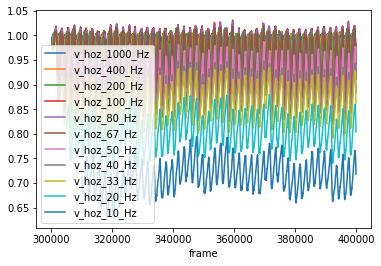

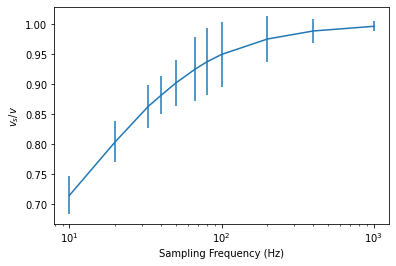

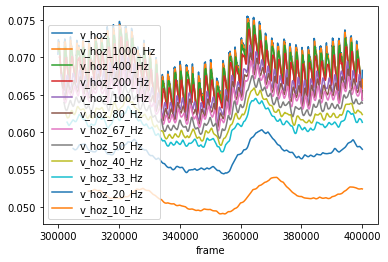

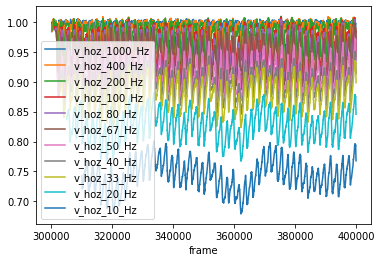

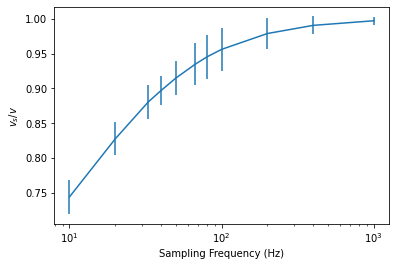

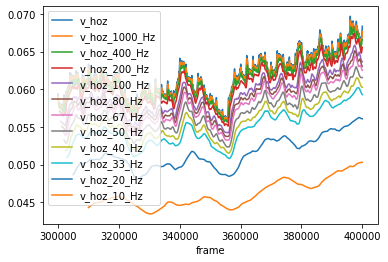

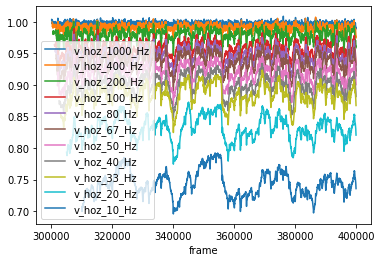

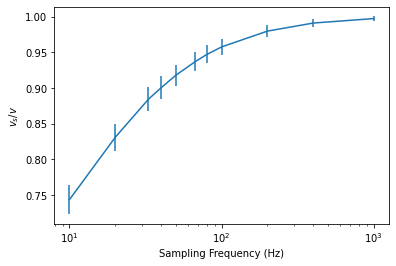

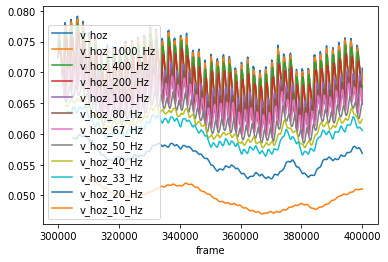

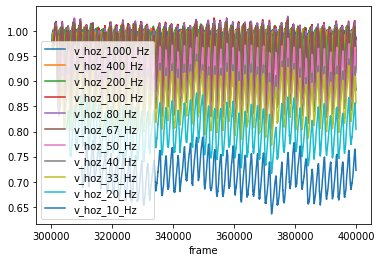

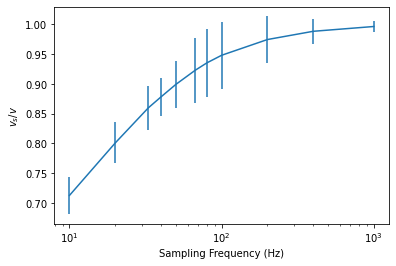

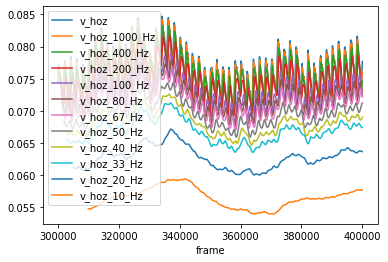

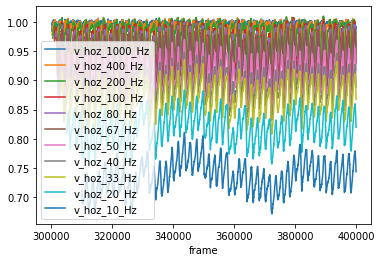

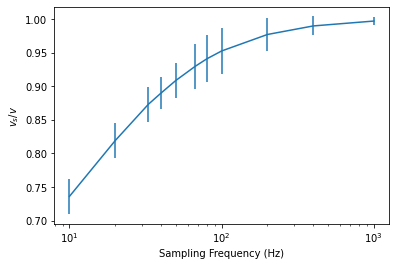

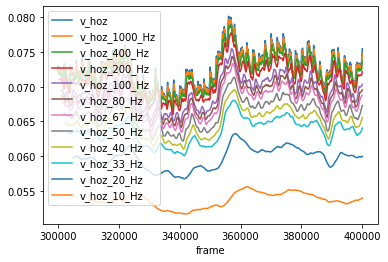

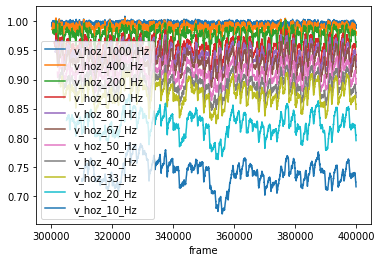

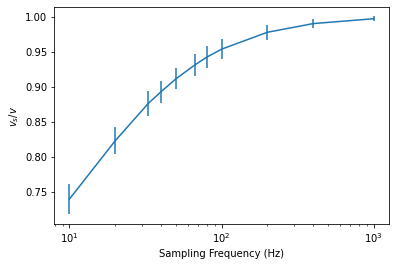

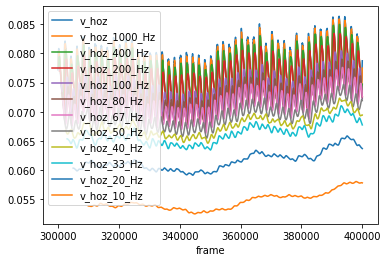

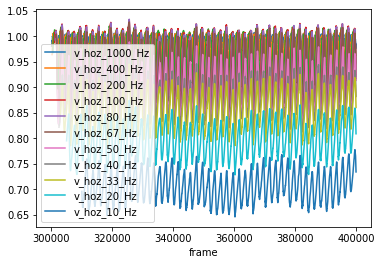

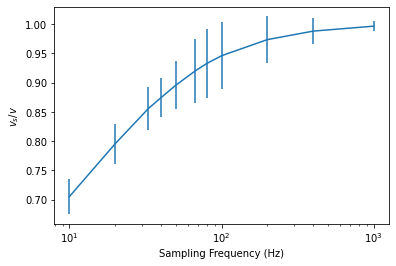

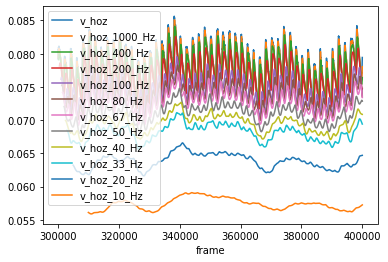

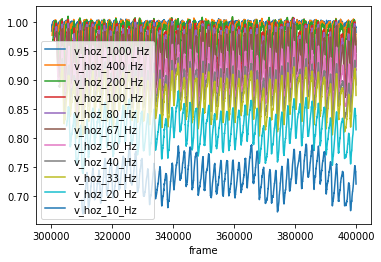

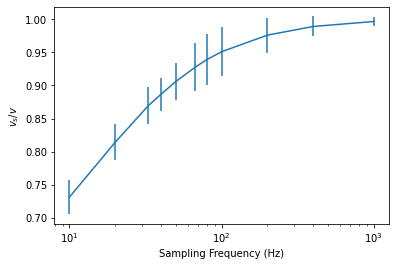

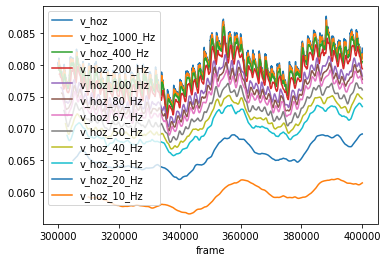

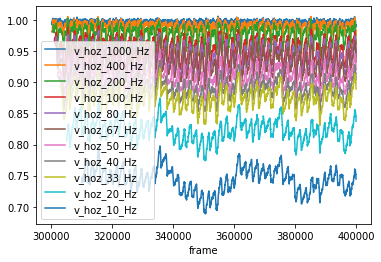

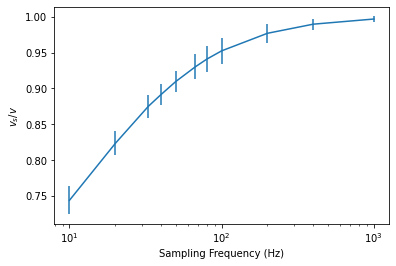

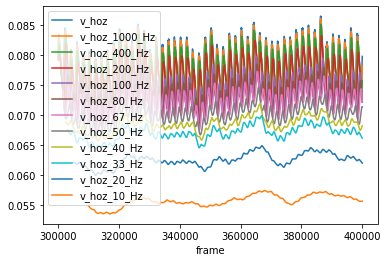

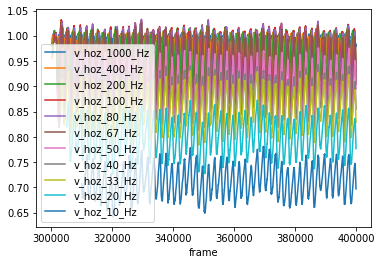

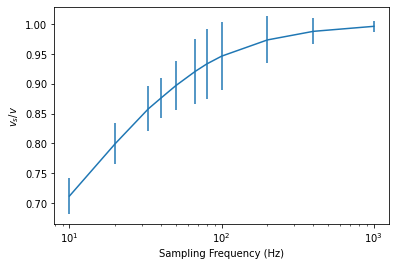

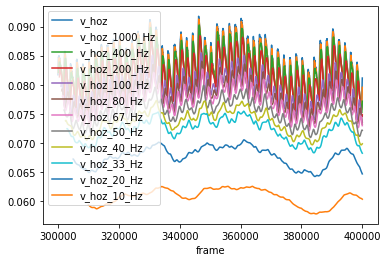

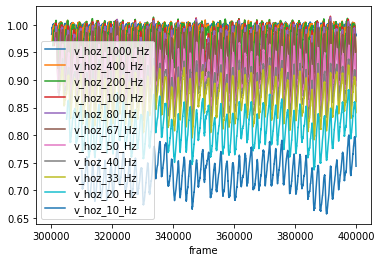

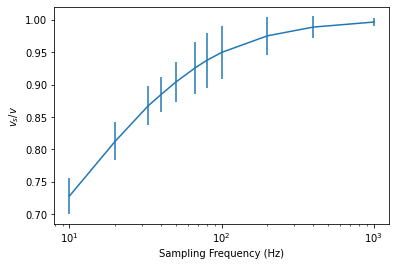

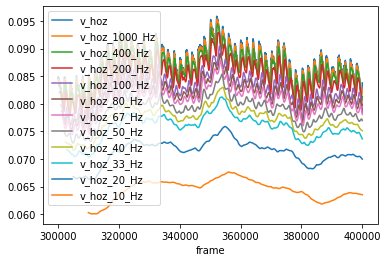

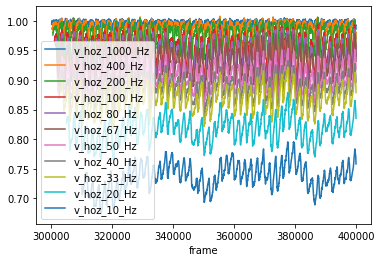

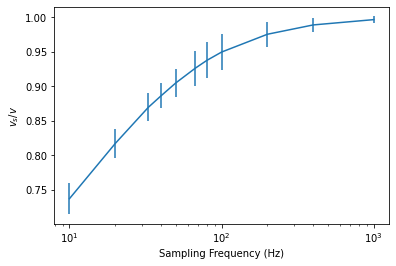

In [4]:
for mean_file, median_file in zip(mean_files, median_files):

    mean_filename = splitext(split(mean_file)[-1])[0]
    median_filename = splitext(split(median_file)[-1])[0]
    assert mean_filename == median_filename, "files must match"
    density, amplitude = mean_filename.split('_')
    mean_data = pd.read_csv(mean_file)
    median_data = pd.read_csv(median_file)
    mean_data = mean_data.set_index('frame')
    median_data = median_data.set_index('frame')
    # plot all
    mean_data.plot()

    print(mean_data.mean())

    # plot fractions
    fractions = mean_data.iloc[:, 1:].div(mean_data.v_hoz, axis=0)
    fractions.plot()

    frequencies_fraction = fractions.mean().index.tolist()
    amount_fraction = fractions.mean().values.tolist()
    amount_fraction_std = fractions.std().values.tolist()
    frequencies_fraction = [int(f.split('_')[2]) for f in frequencies_fraction]

    np.savetxt(f"/media/NAS/share/James/SimulationDataSep22/plot_data/{density}_{amplitude}_mean_fraction.txt", amount_fraction)
    np.savetxt(f"/media/NAS/share/James/SimulationDataSep22/plot_data/{density}_{amplitude}_mean_fraction_std.txt", amount_fraction_std)
    np.savetxt(f"/media/NAS/share/James/SimulationDataSep22/plot_data/{density}_{amplitude}_frequencies.txt", frequencies_fraction)

    plt.figure()
    plt.errorbar(frequencies_fraction, amount_fraction, yerr=amount_fraction_std)
    plt.gca().set_xscale('log')
    plt.xlabel('Sampling Frequency (Hz)')
    plt.ylabel('$v_s/v$')
    plt.savefig(f'/media/NAS/share/James/SimulationDataSep22/Figures/{density}_{amplitude}_log.jpg', dpi=300)

    # print(fractions.mean())
    fractions_frequencies = fractions.mean()




In [61]:
 freq = fractions.mean().index.tolist()
[int(f.split('_')[2]) for f in freq]

[1000, 400, 200, 100, 80, 67, 50, 40, 33, 20, 10]